# Binary classification models with PCA

Used origin Backblaze data from 2019y Q1-Q2 here.

In [1]:
import pandas as pd
import glob

df = pd.concat(map(pd.read_csv, glob.glob("backblaze2019/2019-0[1-3]*.csv")))
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,111.0,35673128.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,187116872.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,73.0,19599104.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81.0,136943696.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(9577046, 129)

## Cleaning 1 (parameters from anomaly detection using IF paper)

In [3]:
df = df.filter(['date','serial_number','smart_5_raw', 'smart_187_raw', 'smart_197_raw', 'failure'])
df.shape

(9577046, 6)

In [4]:
def create_features(g):
    # 5
    smart_5_shifted = g['smart_5_raw'].shift(fill_value=0)
    g['5_diff'] = g['smart_5_raw'] - smart_5_shifted
    #g.at[1, '5_diff'] = 0
    #g.ix[1, '5_diff'] = 0
    # 187
    smart_187_shifted = g['smart_187_raw'].shift(fill_value=0)
    g['187_diff'] = g['smart_187_raw'] - smart_187_shifted
    #g.at[1, '187_diff'] = 0
    #g.ix[1, '187_diff'] = 0
    # 197
    smart_197_shifted = g['smart_197_raw'].shift(fill_value=0)
    g['197_diff'] = g['smart_197_raw'] - smart_197_shifted
    #g.at[1, '197_diff'] = 0
    #g.ix[1, '197_diff'] = 0
    return g


#df = df.groupby(['serial_number'], group_keys=True).filter(lambda g: len(g['failure'].value_counts()) == 1
#                                                           # disk failed => check variance > 0
#                                                           or len(g['failure'].value_counts()) == 2
#                                                          and len(g['5_diff'].value_counts()) > 0
#                                                          and len(g['187_diff'].value_counts()) > 0
#                                                          and len(g['197_diff'].value_counts()) > 0)

#df1 = df1.reset_index()
df1 = df
df1 = df1.groupby(['serial_number'], group_keys=True, as_index=False).apply(lambda x: create_features(x))
df1.reset_index(drop=True, inplace=True)
df1.head(35)

,date,serial_number,smart_5_raw,smart_187_raw,smart_197_raw,failure,5_diff,187_diff,197_diff
0,2019-03-05,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
1,2019-03-06,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2019-03-07,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
3,2019-03-08,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
4,2019-03-09,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
5,2019-03-10,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
6,2019-03-11,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
7,2019-03-12,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
8,2019-03-13,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
9,2019-03-14,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN


In [5]:
df1.shape

(9577046, 9)

In [6]:
df1.drop_duplicates()

,date,serial_number,smart_5_raw,smart_187_raw,smart_197_raw,failure,5_diff,187_diff,197_diff
0,2019-03-05,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
1,2019-03-06,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2019-03-07,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
3,2019-03-08,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
4,2019-03-09,13a2651c44500010,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9577041,2019-03-27,ef29e2d545380010,NaN,NaN,NaN,0,NaN,NaN,NaN
9577042,2019-03-28,ef29e2d545380010,NaN,NaN,NaN,0,NaN,NaN,NaN
9577043,2019-03-29,ef29e2d545380010,NaN,NaN,NaN,0,NaN,NaN,NaN
9577044,2019-03-30,ef29e2d545380010,NaN,NaN,NaN,0,NaN,NaN,NaN


In [7]:
df1 = df1.dropna()
df1.shape

(7394458, 9)

In [8]:
df1.shape

(7394458, 9)

In [9]:
import numpy as np

numeric_data = df1.select_dtypes([np.number])
numeric_mean = numeric_data.mean()
numeric_features = numeric_data.columns

df1 = df1.fillna(numeric_mean)

In [16]:
df_train = df1[(df1['date'] >= "2019-01-01") & (df1['date'] <= "2019-02-28")]
df_test = df1[(df1['date'] >= "2019-03-01") & (df1['date'] <= "2019-03-31")]
print("train shape:", df_train.shape, " test shape:", df_test.shape)

train shape: (4829846, 9)  test shape: (2564612, 9)


In [17]:
string_columns = ['serial_number', 'date']
df_train = df_train.drop(string_columns, axis=1)
df_test = df_test.drop(string_columns, axis=1)

In [18]:
X_train = df_train.drop('failure', axis=1)
y_train = df_train['failure']

X_test = df_test.drop('failure', axis=1)
y_test = df_test['failure']

## Cleaning 2 (using all parameters, reducing number of health disks)

In [19]:
df1 = df[df['model'] == "ST12000NM0007"]
df1.shape

KeyError: 'model'

In [4]:
#df1 = df1[df1.serial_number.duplicated(keep=False)]

# we consider time series with less than 5 elements for failed disks as unpredictable
df1 = df1[df1.groupby('serial_number').serial_number.transform('count') > 5]

In [5]:
df1.shape

(1879291, 129)

In [6]:
df1['serial_number'].value_counts()

ZJV0XJQ4    59
ZCH06ME4    59
ZCH06WWR    59
ZCH06WWA    59
ZCH0BAYE    59
            ..
ZJV2004F     7
ZJV04QPW     6
ZCH07H2T     6
ZCH06LNG     6
ZJV1ZKWZ     6
Name: serial_number, Length: 32432, dtype: int64

In [7]:
# take only several health disks for learning
health_data = df1[df1.groupby('serial_number').serial_number.transform('count')  == 59]
health_data = health_data[health_data['failure'] == 0]
print("number of different health disks serial numbers", len(health_data['serial_number'].unique()))
serial_numbers_to_stay = health_data['serial_number'].unique()[:32000]
health_data = health_data[health_data['serial_number'].isin(serial_numbers_to_stay)]
health_data.shape
print("health data shape", health_data.shape)

df1 = pd.concat([df1, health_data]).drop_duplicates(keep=False)
df1.shape

number of different health disks serial numbers 30633
health data shape (1807344, 129)


(71947, 129)

In [8]:
df1['serial_number'].value_counts()

ZJV1H4BZ    58
ZCH06W6T    58
ZJV1KY5R    58
ZCH06YQ6    58
ZJV1HK9X    58
            ..
ZCH06LNG     6
ZJV04QPW     6
ZCH0DYK0     1
ZCH0AXMF     1
ZCH03YFN     1
Name: serial_number, Length: 1802, dtype: int64

In [9]:
df1.select_dtypes(include='object')

,date,serial_number,model
264,2019-01-01,ZCH05KWT,ST12000NM0007
475,2019-01-01,ZCH0A41V,ST12000NM0007
651,2019-01-01,ZJV1KLRX,ST12000NM0007
1323,2019-01-01,ZJV03JH3,ST12000NM0007
1520,2019-01-01,ZJV024DY,ST12000NM0007
...,...,...,...
104584,2019-02-28,ZJV1CG5D,ST12000NM0007
104591,2019-02-28,ZJV1CG5P,ST12000NM0007
104704,2019-02-28,ZJV2FQW1,ST12000NM0007
104912,2019-02-28,ZJV1CGP1,ST12000NM0007


In [10]:
df_train = df1[(df1['date'] >= "2019-01-01") & (df1['date'] <= "2019-01-31")]
df_test = df1[(df1['date'] >= "2019-02-01") & (df1['date'] <= "2019-02-28")]
print("train shape:", df_train.shape, " test shape:", df_test.shape)

train shape: (25545, 129)  test shape: (46402, 129)


In [11]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df_train['serial_number'])
le.classes_
df_train['serial_number'] = le.transform(df_train['serial_number'])

le = preprocessing.LabelEncoder()
le.fit(df_test['serial_number'])
le.classes_
df_test['serial_number'] = le.transform(df_test['serial_number'])

C:\Users\katevi\AppData\Local\Temp\ipykernel_14900\3303376918.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['serial_number'] = le.transform(df_train['serial_number'])
C:\Users\katevi\AppData\Local\Temp\ipykernel_14900\3303376918.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['serial_number'] = le.transform(df_test['serial_number'])


In [12]:
le.fit(df_train['date'])
le.classes_
df_train['date'] = le.transform(df_train['date'])

le.fit(df_test['date'])
le.classes_
df_test['date'] = le.transform(df_test['date'])

C:\Users\katevi\AppData\Local\Temp\ipykernel_14900\3834778753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['date'] = le.transform(df_train['date'])
C:\Users\katevi\AppData\Local\Temp\ipykernel_14900\3834778753.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['date'] = le.transform(df_test['date'])


In [13]:
df_train = df_train.drop(['model'], axis=1)
df_test = df_test.drop(['model'], axis=1)

In [14]:
# drop all columns which have only NAN values
df_train = df_train.dropna(axis=1, how='all')
df_train.shape

df_test = df_test.dropna(axis=1, how='all')
df_test.shape

(46402, 48)

In [15]:
df_train = df_train.dropna()
df_train.shape

df_test = df_test.dropna()
df_test.shape

(46402, 48)

In [16]:
y_train = df_train['failure']
X_train = df_train.drop('failure',axis=1)

y_test = df_test['failure']
X_test = df_test.drop('failure',axis=1)

In [17]:
X_train['serial_number'].value_counts()

54      31
18      31
857     31
453     31
917     31
        ..
426      3
1098     3
1387     1
1226     1
1288     1
Name: serial_number, Length: 1761, dtype: int64

In [18]:
y_train.value_counts()

0    25499
1       45
Name: failure, dtype: int64

In [19]:
X_test['serial_number'].value_counts()

1181    28
715     28
254     28
1578    28
1229    28
        ..
87       1
291      1
286      1
165      1
3        1
Name: serial_number, Length: 1733, dtype: int64

In [20]:
y_test.value_counts()

0    46339
1       63
Name: failure, dtype: int64

## PCA

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(X_train)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

df_scaled_test = scaler.fit_transform(X_test)
df_scaled_test = pd.DataFrame(df_scaled_test)
df_scaled_test.head()

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.64202,0.0,0.105263
1,0.0,0.0,0.0,0.64202,0.0,0.105263
2,0.0,0.0,0.0,0.64202,0.0,0.105263
3,0.0,0.0,0.0,0.64202,0.0,0.105263
4,0.0,0.0,0.0,0.64202,0.0,0.105263


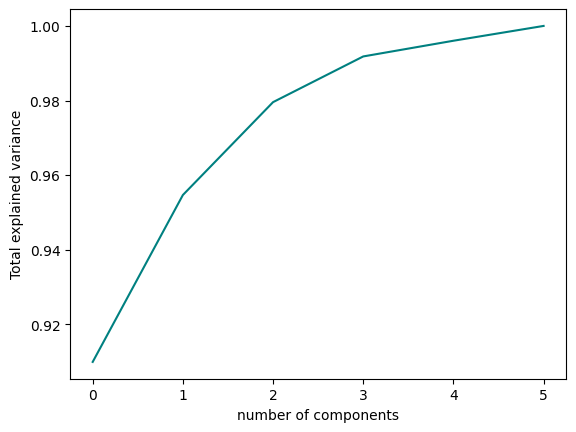

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pca = PCA().fit(df_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='teal') 
plt.xlabel('number of components') 
plt.ylabel('Total explained variance'); 

In [22]:
pca = PCA(0.80).fit(df_scaled)
pca.n_components_ 

1

In [23]:
pca = PCA(0.95).fit(df_scaled)
pca.n_components_ 

2

In [26]:
from sklearn.decomposition import PCA

components = [2, 5]
X_reduced = []
for reduced_dims in components:
    pca = PCA(n_components=reduced_dims)
    X_transformed = pca.fit_transform(df_scaled)
    X_reduced.append(X_transformed)

## Helper methods

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std


accuracies = {}
models = {}

# common methods
def get_best_accuracy_from_estimators(dictionary, X, y):
    estimators = dictionary['estimator']
    max_accuracy = 0.
    for estimator in estimators:
        y_pred = estimator.predict(X)
        accuracy = accuracy_score(y, y_pred)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
    return max_accuracy

def classification_using_cross_val(model):    
    # repeated k fold validation with tuned hyperparameters
    lr_accuracies = []
    max_accuracy = 0.
    number_of_folds = 0
    ks = range(3,13)
    for i in ks:
        cv = RepeatedKFold(n_splits=i, n_repeats=3, random_state=1)
        dictionary = cross_validate(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, return_estimator=True)
        accuracy = get_best_accuracy_from_estimators(dictionary, X_test, y_test)
        if (accuracy > max_accuracy):
            max_accuracy = accuracy
            number_of_folds = i
        lr_accuracies.append(accuracy)  
    return (max_accuracy, number_of_folds)

def simple_classification(lr):
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    print("Test Accuracy without repeated k-Fold Cross-Validation {:.4f}".format(acc))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def knn_using_cross_val_and_tuning_hp():
    # tuning hyperparameters
    n_neighbors = range(1, 21, 2)
    weights = ['uniform', 'distance']
    metric = ['euclidean', 'manhattan', 'minkowski']
    # define grid search
    grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
    searcher=GridSearchCV(KNeighborsClassifier(), grid, scoring='accuracy', cv=5)
    searcher.fit(X_train,y_train)
    # creating model
    best_neighbors = searcher.best_params_['n_neighbors']
    best_weights = searcher.best_params_['weights']
    best_metric = searcher.best_params_['metric']
    print("Best n neighbors = ", best_neighbors)
    print("Best penalty = ", best_weights)
    print("Best metric = ", best_metric)
    model = KNeighborsClassifier(n_neighbors=best_neighbors, weights=best_weights, metric=best_metric)
    # calculating accuracy
    return classification_using_cross_val(model), model

knn = KNeighborsClassifier()
simple_classification(knn)
(accuracy, number_of_folds) = classification_using_cross_val(knn)
print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, accuracy))
((accuracy, number_of_folds), best_model) = knn_using_cross_val_and_tuning_hp()
print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))

accuracies['KNN'] = accuracy
models['KNN'] = best_model

In [ ]:
%%time
import time

knn = best_model

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)
knn.fit(X_train, y_train)
print(time.strftime("%H:%M:%S", time.localtime()))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred_train = knn.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training set accuracy: ", accuracy_train)

y_pred_test = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test set accuracy: ", accuracy_test)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f')
plt.show()

## RF

In [ ]:
%%time 

from sklearn.ensemble import RandomForestClassifier
import time 

clf = RandomForestClassifier(n_estimators=10, random_state=42)

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)
clf.fit(X_train, y_train)
print(time.strftime("%H:%M:%S", time.localtime()))

In [ ]:
%%time

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training set accuracy: ", accuracy_train)

y_pred_test = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test set accuracy: ", accuracy_test)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f')
plt.show()